# <font color=blue>  Análises de Probabilidades de Evasão</font>
## <font color=black>   Disciplinas do 1º semestre </font>

#### <font color=black> Escopo de análise delimitado entre o primeiro semestre de 2009 até o último semestre de 2018 do curso de Engenharia da Computação da Universidade de Brasília.</font>

In [2]:
#importar bibliotecas
import numpy as np
import pandas as pd
import csv
import json
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

#inicialização biblioteca de 
sns.set()

In [3]:
path = 'dados/ingresso_saida_2.csv'
df_in_out = pd.read_csv(path, sep =',')
df_in_out.head()

,id_u,id_aluno,ano_ingresso,semestre_ingresso,ano_saida,semestre_saida,forma_saida,evadiu
0,1,aluno88,2008,2,2017,2,Formatura,0
1,2,aluno6,2009,2,2014,1,Formatura,0
2,3,aluno29,2009,2,Ativo,Ativo,Aluno Ativo,0
3,4,aluno31,2009,2,2015,2,Formatura,0
4,5,aluno38,2009,2,2010,0,Desligamento Voluntário,1


In [4]:
#Compreeensão dos dados no dataframe e da distribuição geral dos mesmos
saida = df_in_out['forma_saida'].value_counts()
total_estudantes = np.sum(saida)
saida_prob = np.divide(saida,total_estudantes)
saida_prob

Aluno Ativo                       0.477376
Formatura                         0.142534
Deslig - não cumpriu condição     0.126697
Novo Vestibular                   0.102941
Desligamento - Abandono           0.046380
Desligamento Voluntário           0.044118
Repr 3 vezes na mesma disc obr    0.042986
Anulação de Registro              0.012443
Falecimento                       0.002262
Transferência                     0.001131
Desligamento Falt Documentação    0.001131
Name: forma_saida, dtype: float64

In [5]:
total_estudantes_saidos = np.sum(df_in_out.id_u.value_counts())
df_aux = df_in_out[~df_in_out.forma_saida.str.contains("Ativo")]
saida = np.sum(df_aux.id_u[df_aux.forma_saida != "Formatura"].value_counts())
prob_saida = np.divide(saida,total_estudantes)
print(prob_saida)

0.38009049773755654


In [6]:
path = 'agregado_semestres_21.csv'
df_disciplinas = pd.read_csv(path, sep =',')
df_disciplinas.head()

,Unnamed: 0,id_aluno,ano_ingresso,semestre_ingresso,cod_disciplina,mencao,ano_referencia,semestre_referencia,periodo_cursou_disciplina,id_tabela_ingresso,evadiu
0,0,aluno88,2008,2,113093,SR,2009,2,2,1,0
1,1,aluno88,2008,2,118001,MI,2009,2,2,1,0
2,2,aluno88,2008,2,118001,SR,2009,2,2,1,0
3,3,aluno88,2008,2,113034,II,2010,1,3,1,0
4,4,aluno88,2008,2,118001,MI,2013,2,10,1,0


In [7]:
def prob_evadiu(disciplinas,evadiu):
    
    aprovados_evadiu = df_disciplinas.id_tabela_ingresso.to_frame()
    aprovados_total = df_disciplinas.id_tabela_ingresso.to_frame()
    total_alunos = df_disciplinas.id_tabela_ingresso.to_frame()
    for dis in disciplinas:
        
        
        total = (df_disciplinas[(df_disciplinas.cod_disciplina == dis)])
        aprovados = total.id_tabela_ingresso[((total.mencao == "SR") | 
                                        (total.mencao == "II") | 
                                        (total.mencao == "MI") |
                                        (total.mencao == "TR") | 
                                        (total.mencao == "TJ"))]
        
        df_evadiu = (df_disciplinas[(df_disciplinas.cod_disciplina == dis)&(df_disciplinas.evadiu == evadiu)])
        evadiu_alunos = df_evadiu.id_tabela_ingresso[((total.mencao == "SR") | 
                                               (total.mencao == "II") | 
                                               (total.mencao == "MI") |
                                               (total.mencao == "TR") | 
                                               (total.mencao == "TJ"))]
        
        aprovados = aprovados.to_frame()
        evadiu_alunos = evadiu_alunos.to_frame()
        total = total.id_tabela_ingresso.to_frame()
        total_alunos = total_alunos.merge(total, how='inner')
        total_alunos = total_alunos.drop_duplicates()
        aprovados_total = aprovados_total.merge(aprovados, how='inner')
        aprovados_total = aprovados_total.drop_duplicates()
        aprovados_evadiu = aprovados_evadiu.merge(evadiu_alunos, how='inner')
        aprovados_evadiu = aprovados_evadiu.drop_duplicates()
        
    
    total_alunos = np.sum(total_alunos.id_tabela_ingresso.value_counts())
    #print("total " + str(total_alunos))
    aprovados_total = np.sum(aprovados_total.id_tabela_ingresso.value_counts())
    #print("aprovados "+ str(aprovados_total))
    aprovados_evadiu = np.sum(aprovados_evadiu.id_tabela_ingresso.value_counts())
    #print("a e evadiu "+ str(aprovados_evadiu))
    prob_aprovado_evadiu = aprovados_evadiu/aprovados_total
    prob_aprovado = aprovados_total / total_alunos
    return prob_aprovado_evadiu


In [8]:
semestre1 = [118010,118001,117528,116301,113093,113034]
data = []
dis_sem1 = list(itertools.combinations_with_replacement(semestre1,2))
for dis in dis_sem1:
    aux = prob_evadiu([dis[0],dis[1]],1) 
    #prob = prob_condicionais(aux[0],aux[1],prob_saida) 
    data.append([str(dis[0]),str(dis[1]),aux])


#### <font color=black> Mapas de calor da probabilidade de evasão dada reprovações nas disciplinas</font>

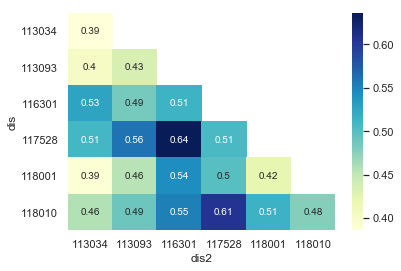

In [9]:
heat = pd.DataFrame(data,columns=['dis', 'dis2', 'prob'])
heat = heat.pivot('dis', 'dis2', 'prob')
with sns.axes_style("white"):
    ax = sns.heatmap(heat,annot=True,cmap="YlGnBu")


In [10]:
data2 = []
dis_sem12 = list(itertools.combinations(semestre1,3))
for dis in dis_sem12:
    aux = prob_evadiu([dis[0],dis[1],dis[2]],1) 
    #prob = prob_condicionais(aux[0],aux[1],prob_saida) 
    data2.append([str(dis[0]),str(dis[1])+'/'+str(dis[2]),aux])


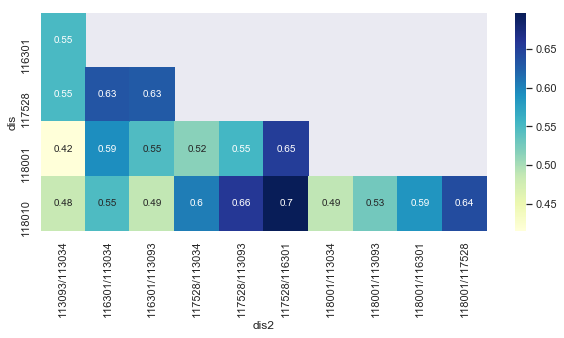

In [11]:
heat2 = pd.DataFrame(data2,columns=['dis', 'dis2', 'prob'])
heat2 = heat2.pivot('dis', 'dis2', 'prob')
fig2, ax2 = plt.subplots(figsize=(10,4))
with sns.axes_style("white"):
    ax2 = sns.heatmap(heat2,annot=True,cmap="YlGnBu")


In [13]:
data3 = []
dis_sem13 = list(itertools.combinations(semestre1,4))
for dis in dis_sem13:
    aux = prob_evadiu([dis[0],dis[1],dis[2],dis[3]],1) 
    #prob = prob_condicionais(aux[0],aux[1],prob_saida) 
    data3.append([str(dis[0])+'/'+str(dis[1]),str(dis[2])+'/'+str(dis[3]),aux])


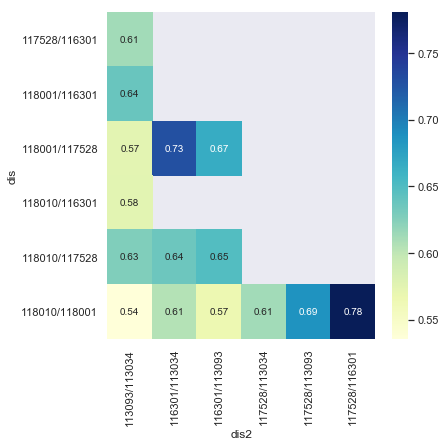

In [14]:
heat3 = pd.DataFrame(data3,columns=['dis', 'dis2', 'prob'])
heat3 = heat3.pivot('dis', 'dis2', 'prob')
fig3, ax3 = plt.subplots(figsize=(6,6))
with sns.axes_style("white"):
    ax3 = sns.heatmap(heat3,annot=True,cmap="YlGnBu")


In [15]:
data4 = []
dis_sem14 = list(itertools.combinations(semestre1,5))
for dis in dis_sem14:
    aux = prob_evadiu([dis[0],dis[1],dis[2],dis[3],dis[4]],1) 
    #prob = prob_condicionais(aux[0],aux[1],prob_saida) 
    data4.append([str(dis[0])+'/'+str(dis[1]),str(dis[2])+'/'+str(dis[3])+'/'+str(dis[4]),aux])


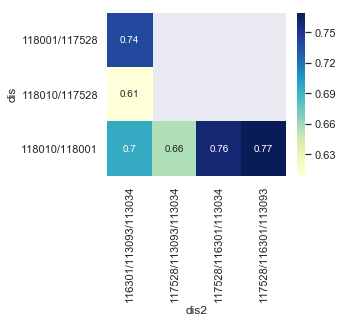

In [16]:
heat4 = pd.DataFrame(data4,columns=['dis', 'dis2', 'prob'])
heat4 = heat4.pivot('dis', 'dis2', 'prob')
fig4, ax4 = plt.subplots(figsize=(4,3))
with sns.axes_style("white"):
    ax4 = sns.heatmap(heat4,annot=True,cmap="YlGnBu")


In [17]:
aux = prob_evadiu(semestre1,1) 
#prob = prob_condicionais(aux[0],aux[1],prob_saida)
print(aux)

0.8125
